In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.optimize as so
data = np.loadtxt('decaytimes.csv',delimiter=',').T

**Exercise 1**

a) + b) See pdf.

c)

7.841447087690194


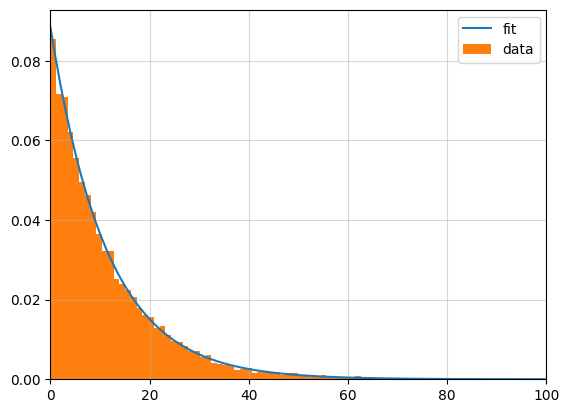

In [3]:
tau_est = np.log(2) * np.mean(data)
print(tau_est)

t = np.linspace(0,100,100)
f = lambda t, tau: np.log(2)/tau * np.exp(-t * np.log(2)/tau)

plt.plot(t, f(t, tau_est), label = "fit")
plt.hist(data, bins = 80, fill = True, label = "data", density = True)
plt.legend(); plt.grid(alpha = 0.5)
plt.xlim(0, 100)
plt.show()

d)

In [26]:
def LLH_ext(params): #params = [v, tau]
    return -params[0] + sum(np.log(params[0] * f(data, params[1])))

res = so.minimize(lambda params: -LLH_ext(params), [10000, 10], bounds = [(1, None), (1e-10, None)])
#print(res)

v_so, tau_so = res.x[0], res.x[1]
print("v =", v_so, "\ntau =", tau_so)

v = 10000.004224728093 
tau = 7.841293210645774


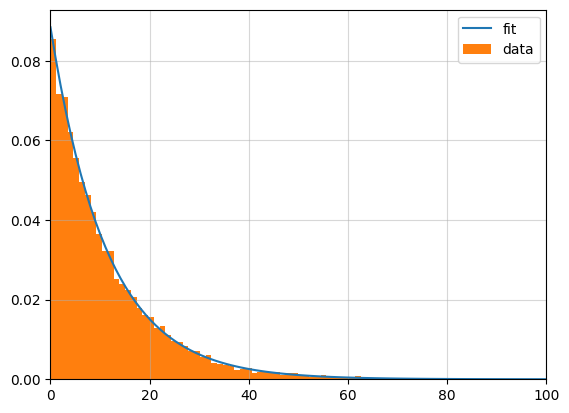

In [27]:
plt.plot(t, f(t, tau_so), label = "fit")
plt.hist(data, bins = 80, fill = True, label = "data", density = True)
plt.legend(); plt.grid(alpha = 0.5)
plt.xlim(0, 100)
plt.show()

e)

C:\Users\janik\AppData\Local\Temp\ipykernel_20672\1723294450.py:2: RuntimeWarning: divide by zero encountered in log
  return -params[0] + sum(np.log(params[0] * f(data, params[1])))


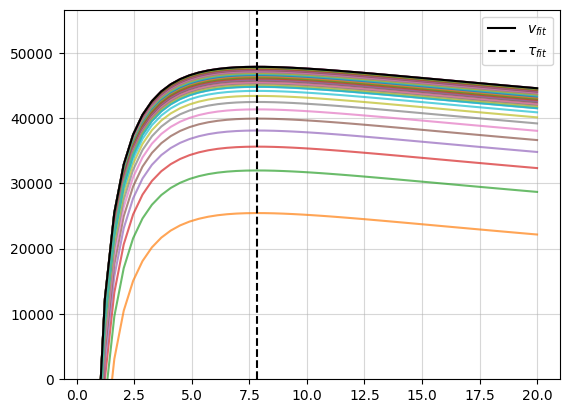

In [32]:
V = np.linspace(0, 20000, 50); Tau = np.linspace(1e-10, 20, 50)

for v in V:
    LLH = [LLH_ext([v, tau]) for tau in Tau]
    plt.plot(Tau, LLH, alpha = 0.7)

plt.plot(Tau, [LLH_ext([v_so, tau]) for tau in Tau], color = "black", label = "$v_{fit}$")
plt.axvline(tau_so, ls = '--', color = "black", label = r"$\tau_{fit}$")
plt.ylim(0, None)
plt.legend(); plt.grid(alpha = 0.5)
plt.show()